In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For scikit-learn, you usually import specific components:
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset
bc_data = pd.read_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT-1\Breast Cancer Wisconsin.csv')
print(bc_data.head())
print(bc_data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

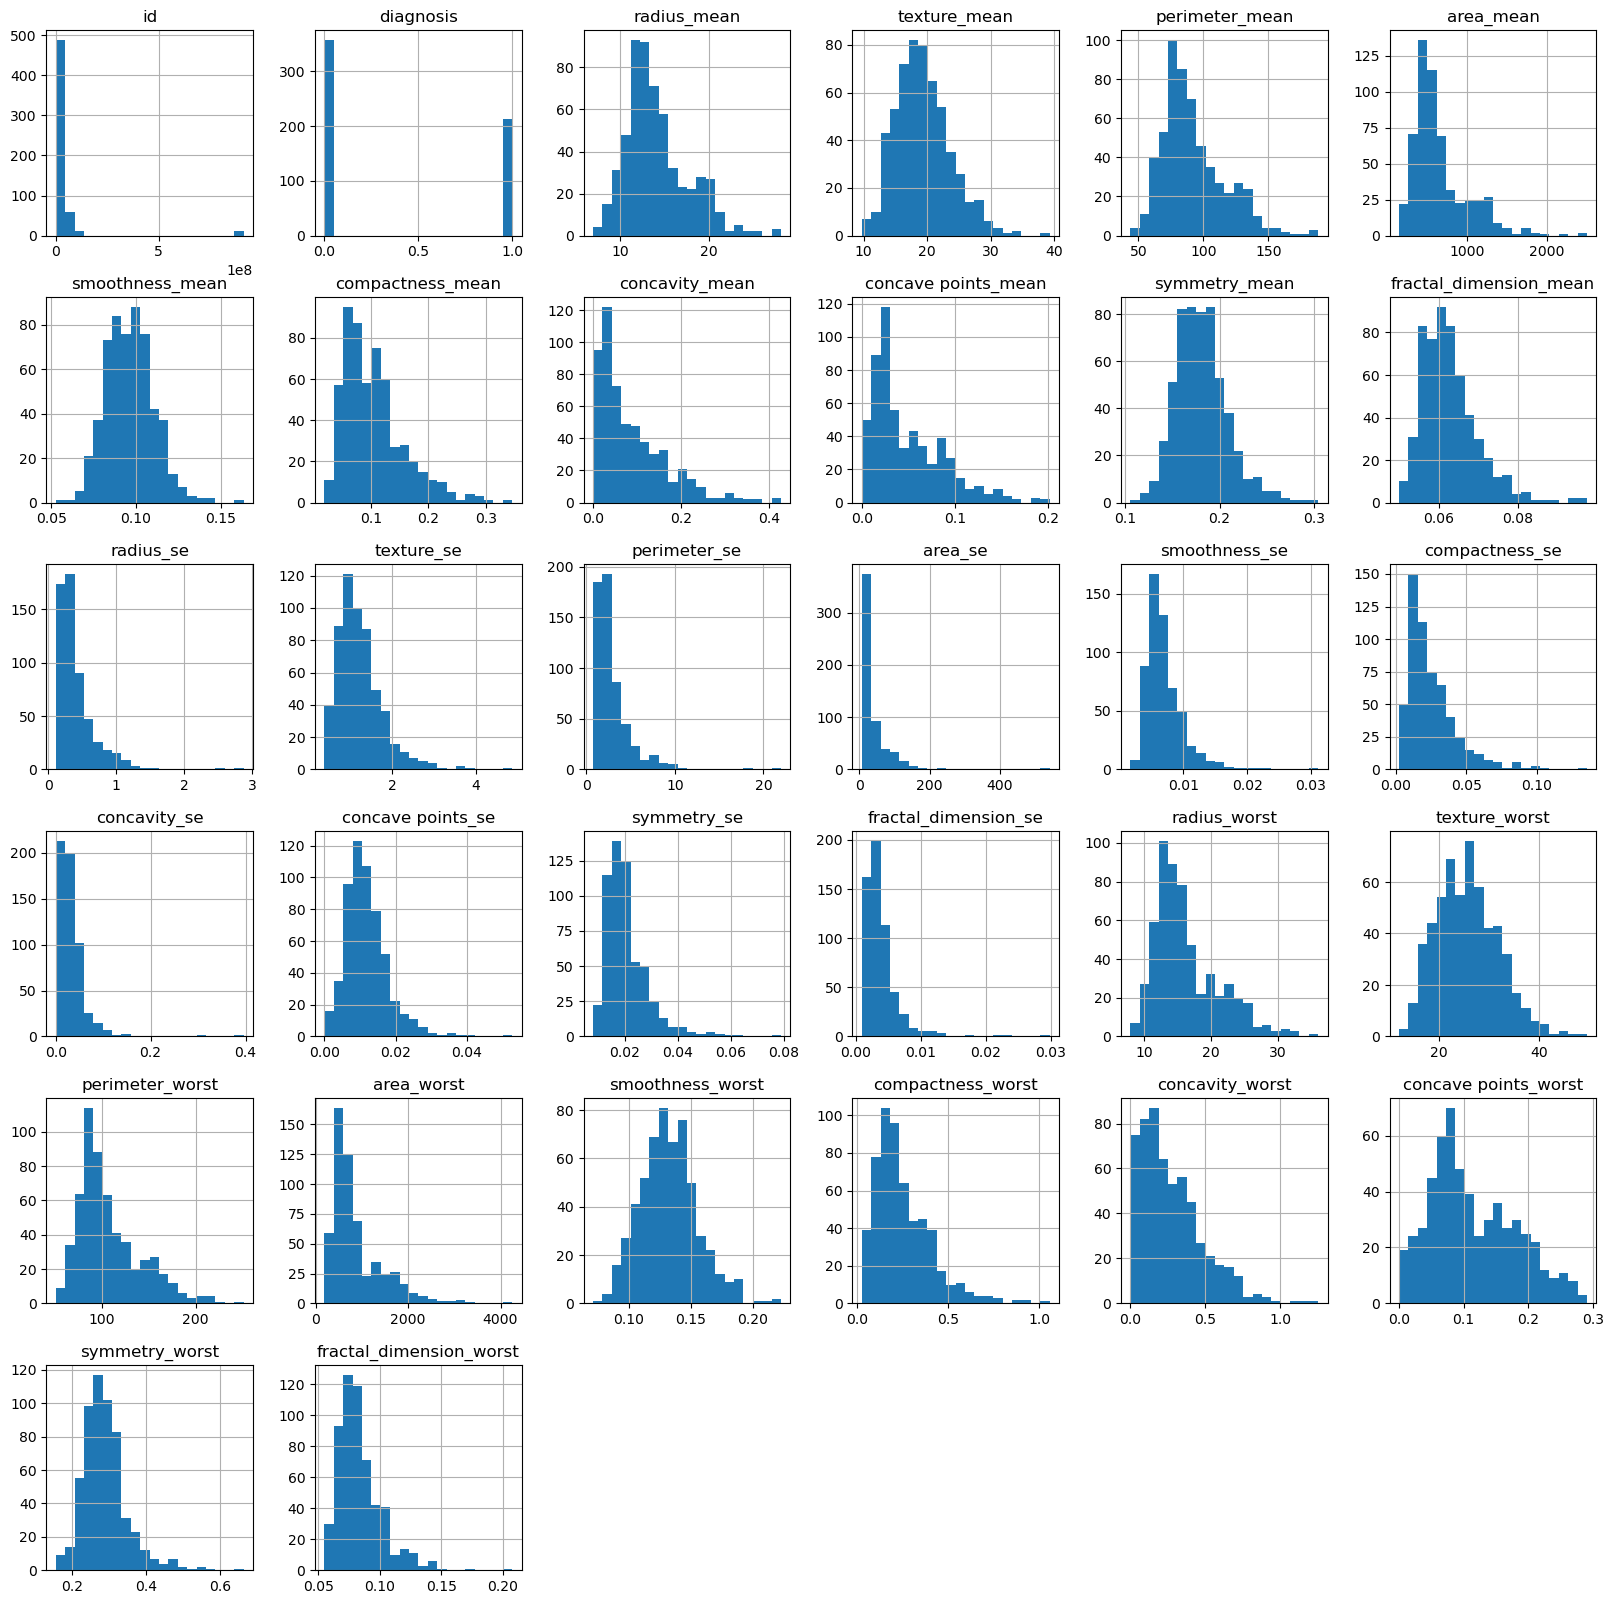

In [71]:
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})
bc_data.hist(figsize=(20, 20), bins=20)
plt.show()


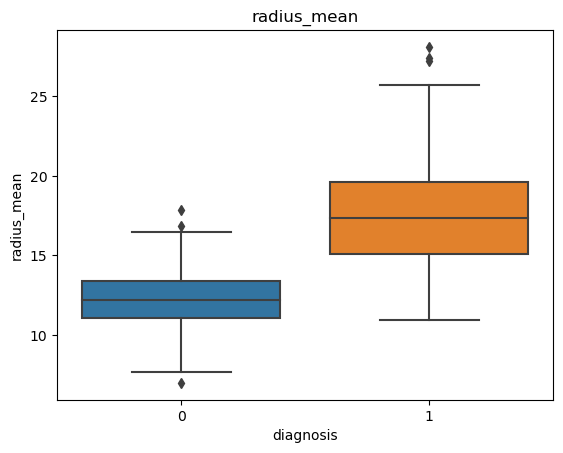

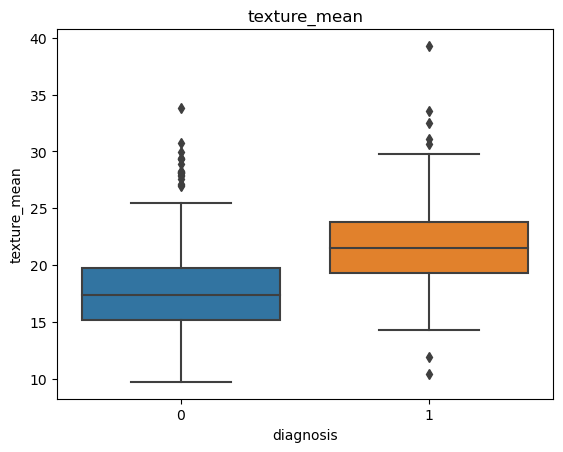

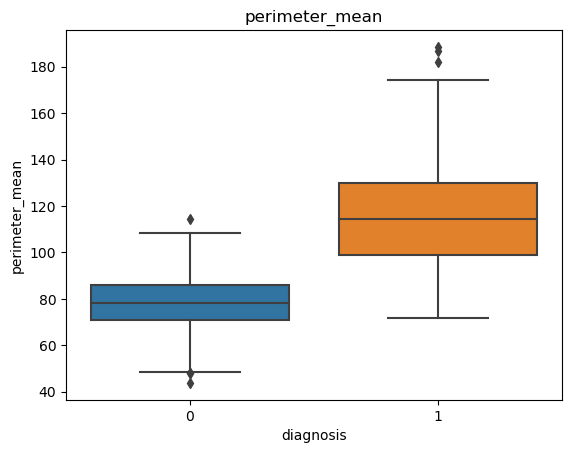

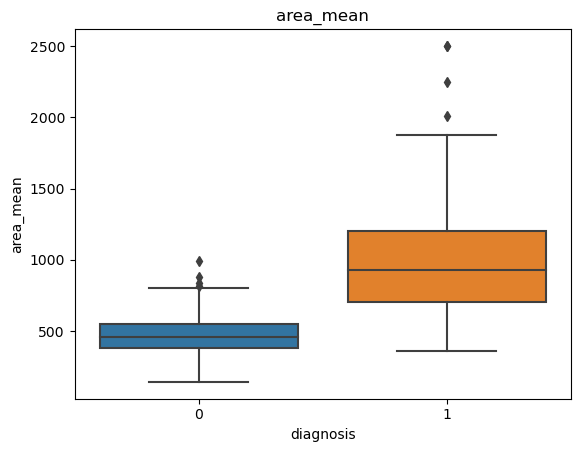

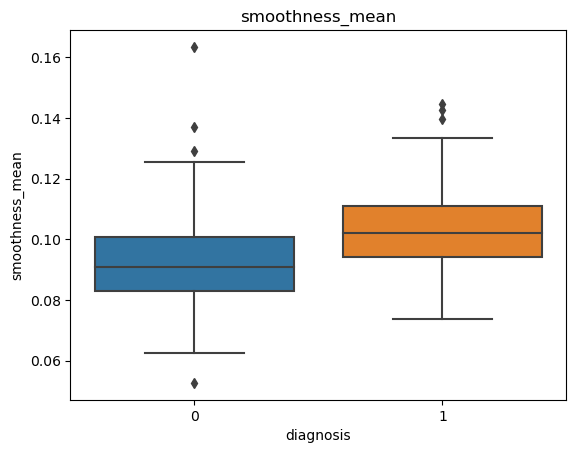

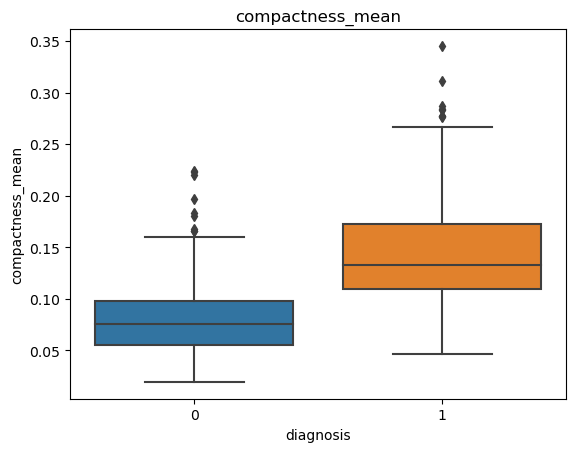

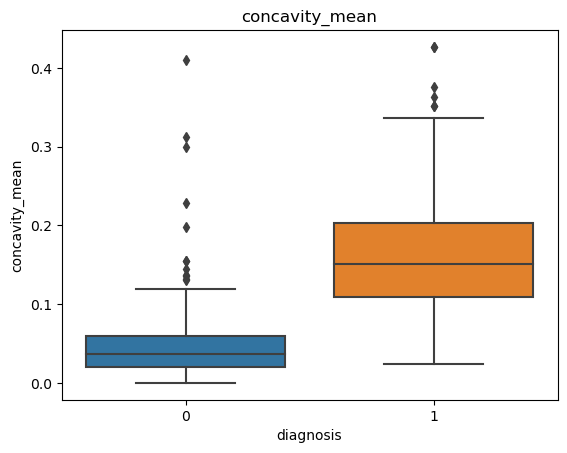

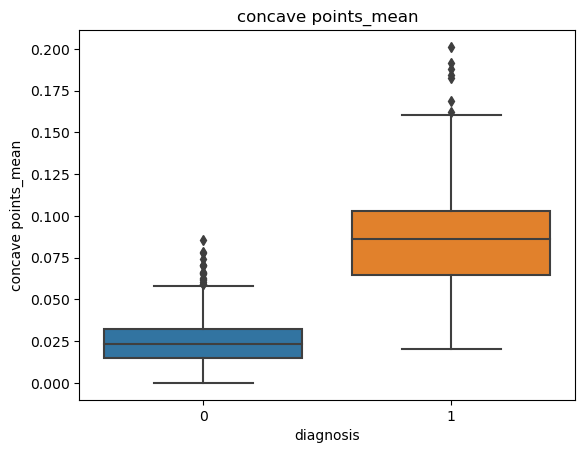

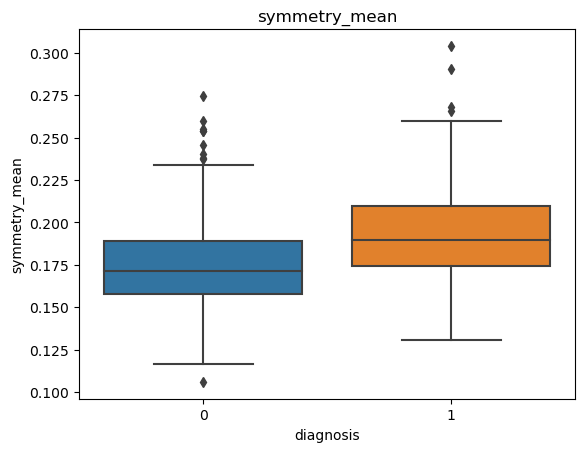

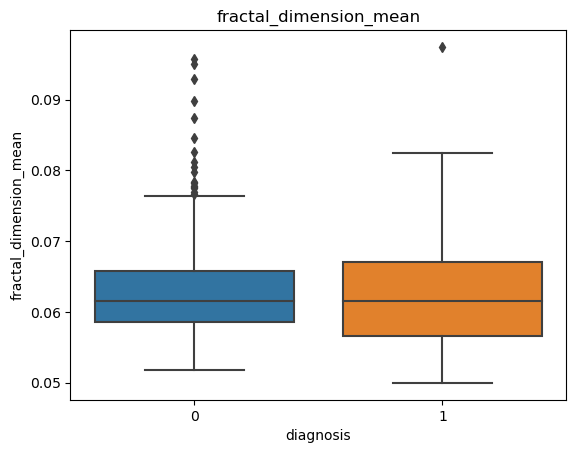

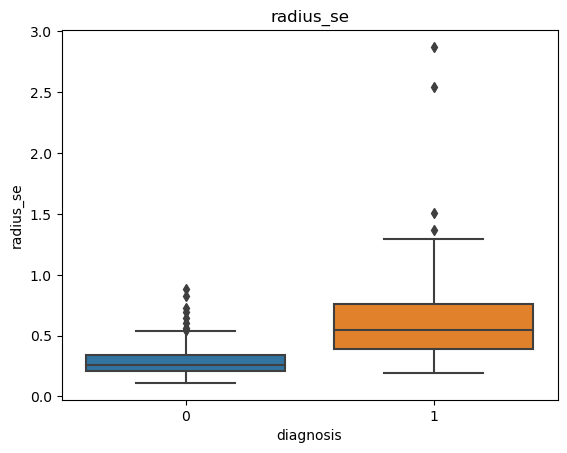

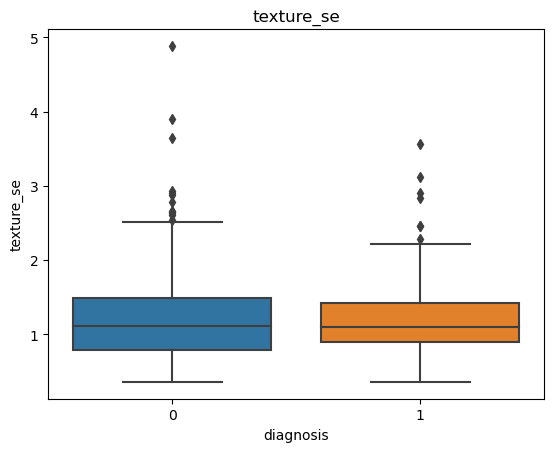

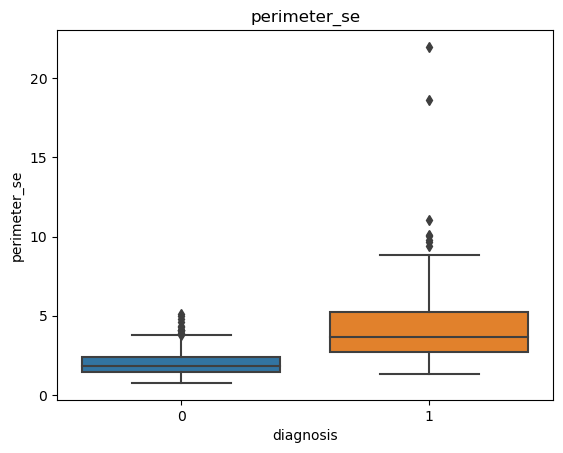

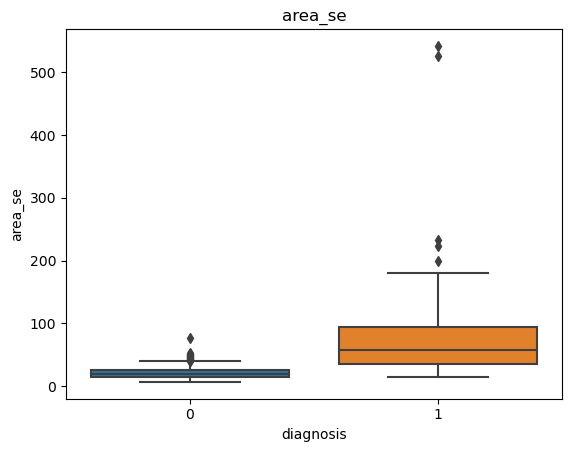

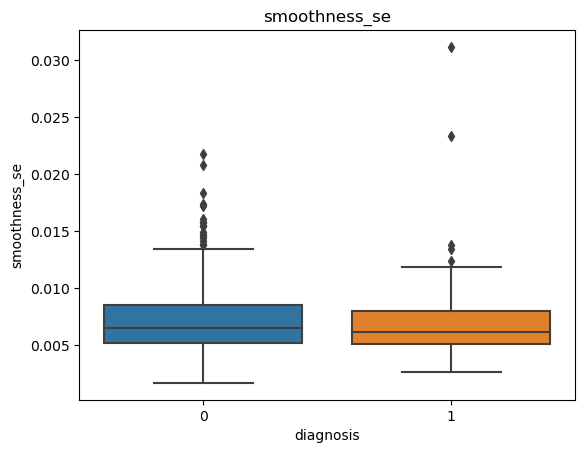

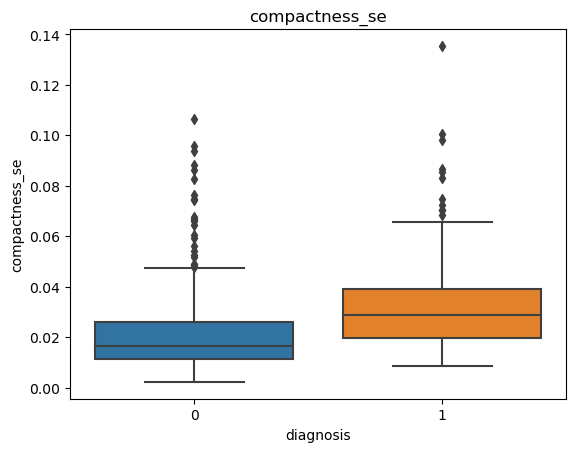

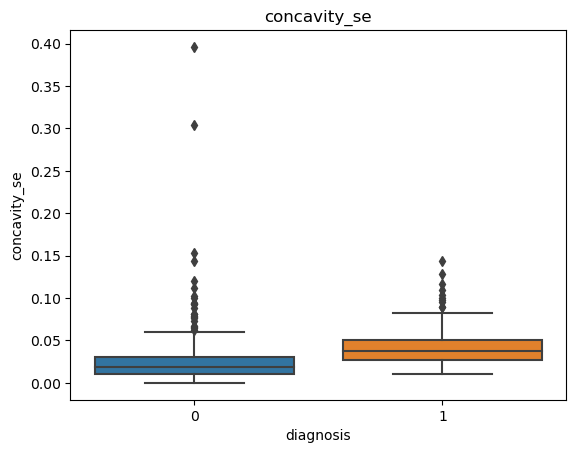

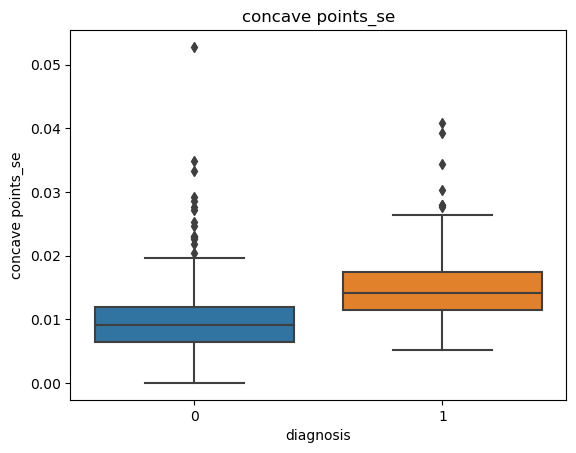

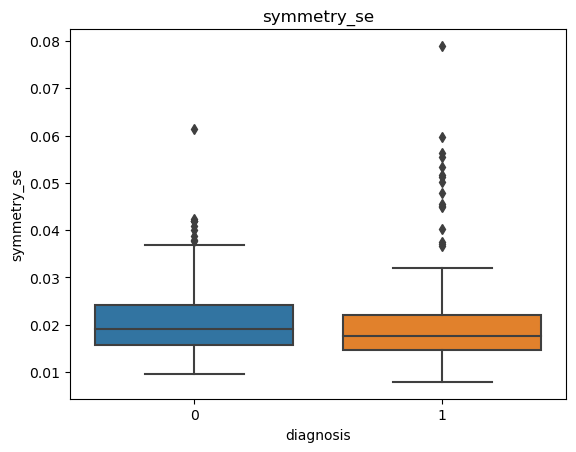

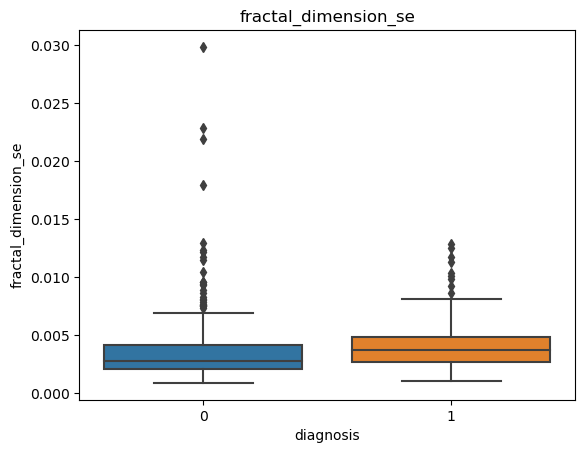

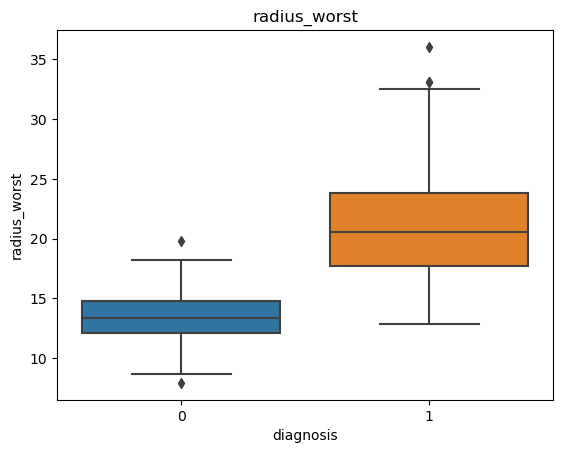

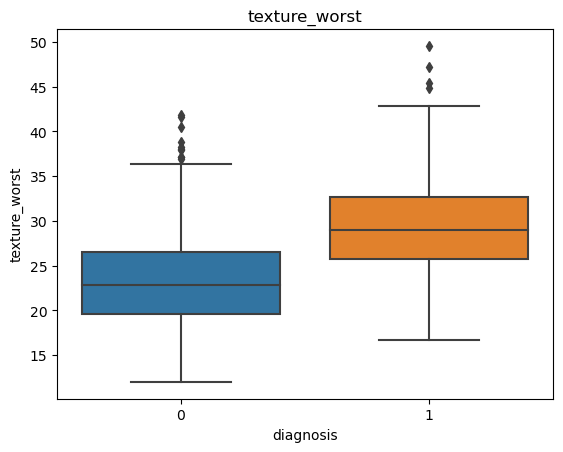

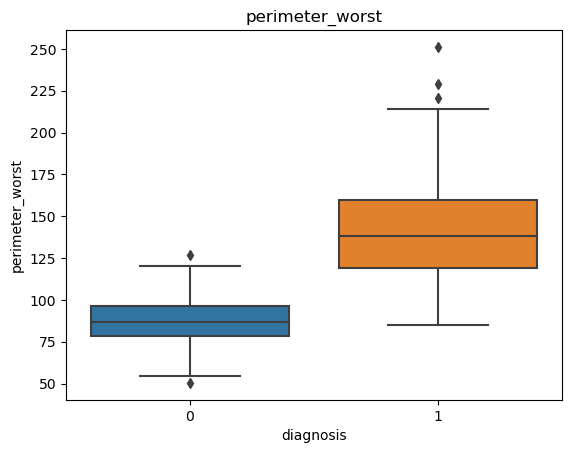

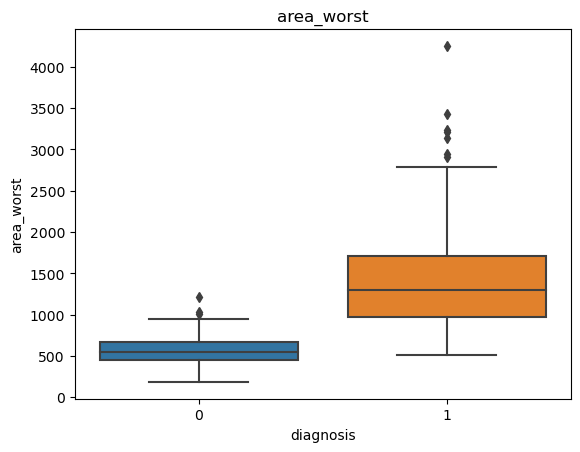

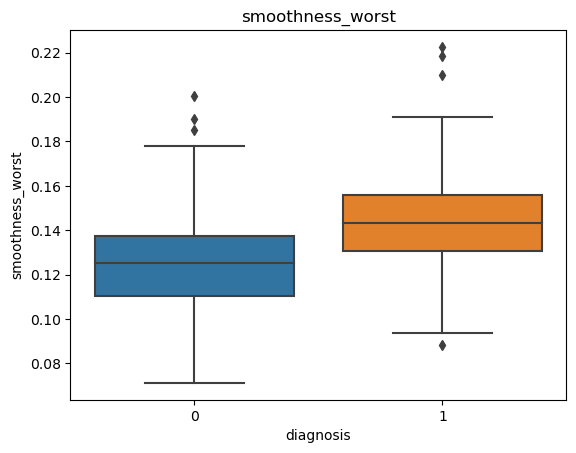

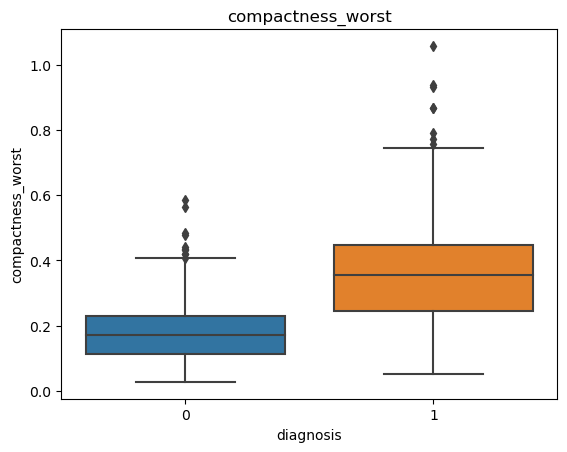

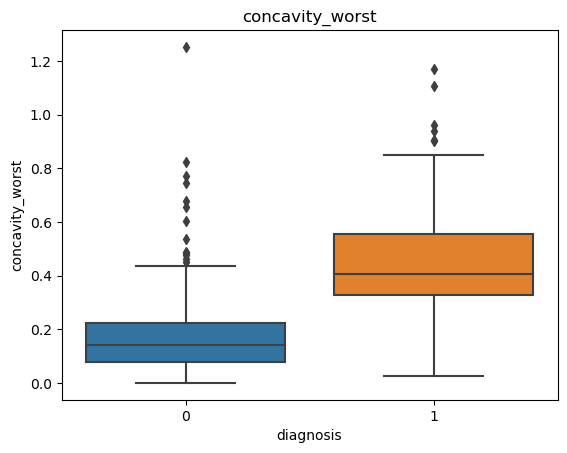

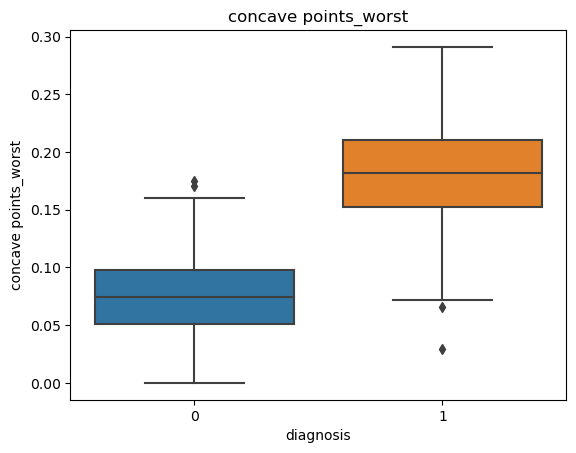

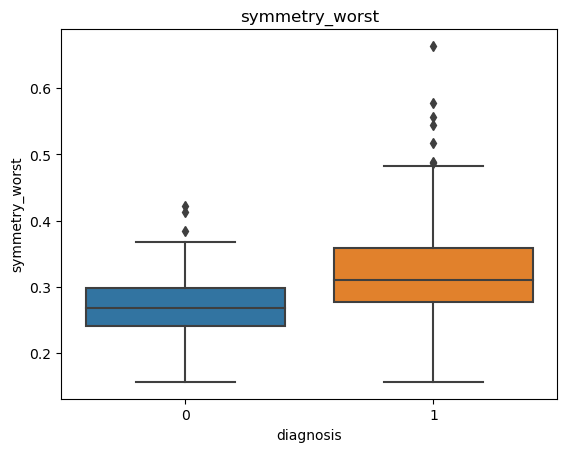

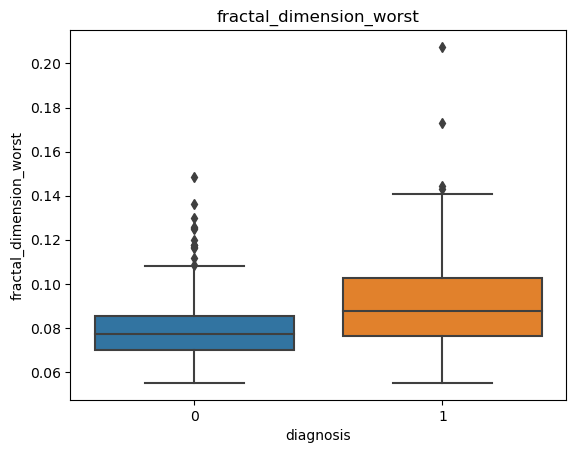

In [72]:
for column in bc_data.drop(['id', 'diagnosis'], axis=1).columns:
    sns.boxplot(x='diagnosis', y=column, data=bc_data)
    plt.title(column)
    plt.show()

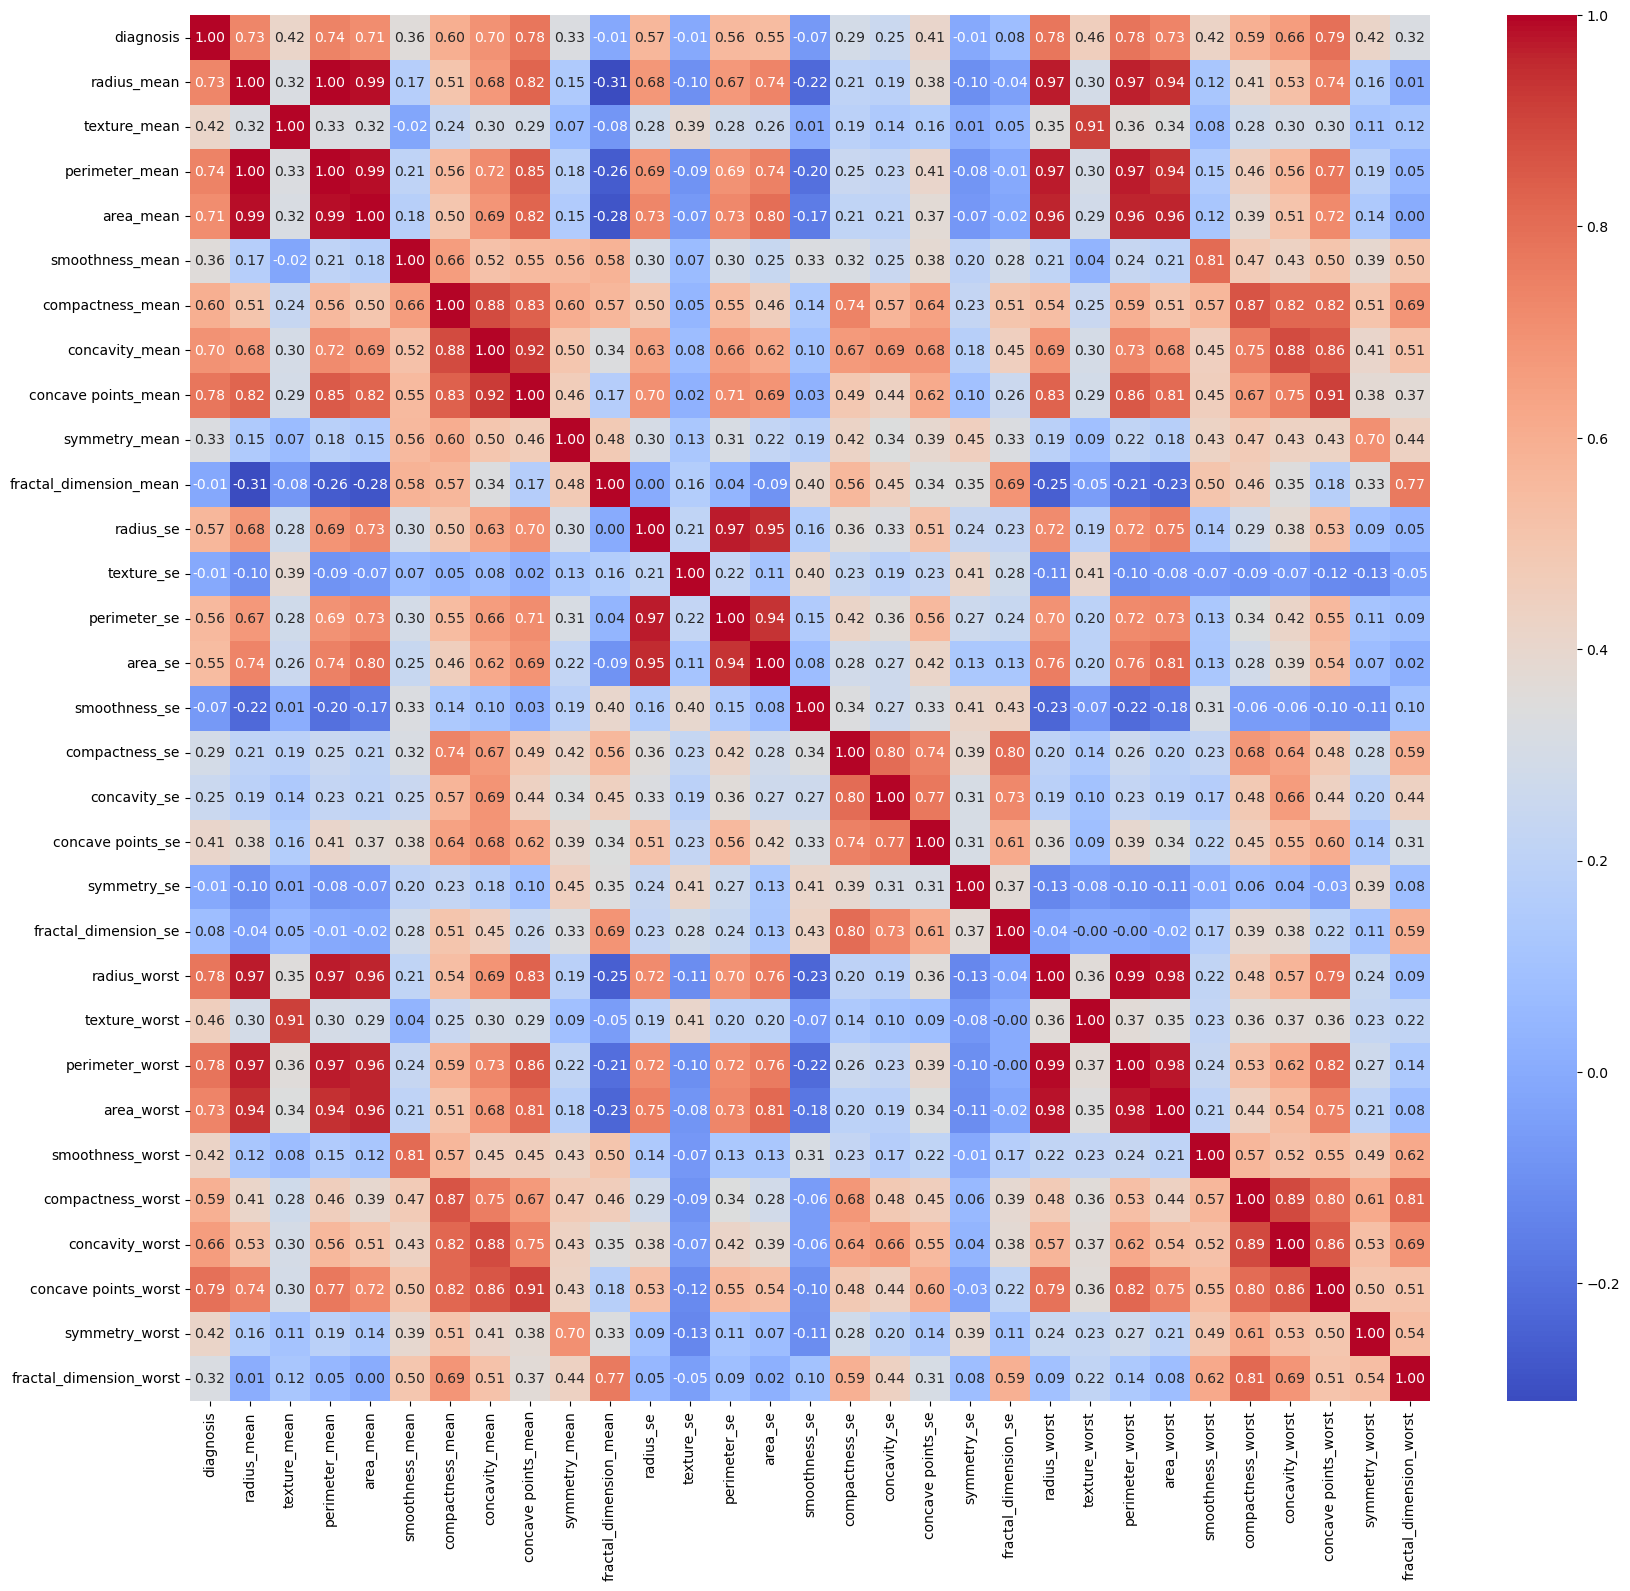

In [73]:

plt.figure(figsize=(20, 18))
sns.heatmap(bc_data.drop('id', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


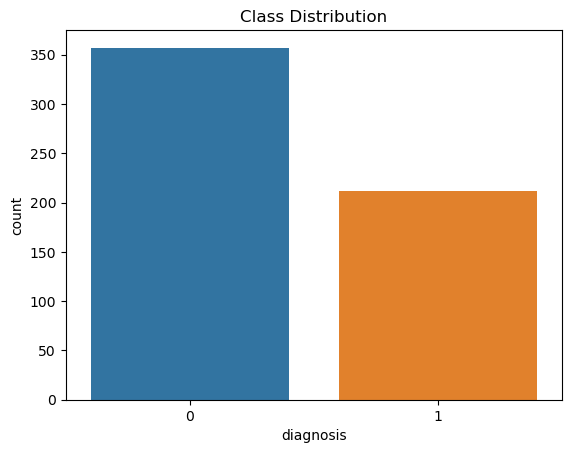

In [74]:
sns.countplot(x='diagnosis', data=bc_data)
plt.title('Class Distribution')
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)




In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choose a weak learner and aggressively prune tree
weak_learner = DecisionTreeClassifier(max_depth=1)

# Instantiate AdaBoost with the weak learner
ada_clf = AdaBoostClassifier(
    base_estimator=weak_learner,
    n_estimators=50,  # initial number of trees
    learning_rate=1,  # initial learning rate
    random_state=42
)


In [78]:
# Assuming X_train and y_train are your features and labels for training
ada_clf.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, random_state=42)

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}

# Instantiate Grid Search
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)
# Convert the grid search results to a DataFrame for easier manipulation
results = pd.DataFrame(grid_search.cv_results_)

# Extract mean test scores for each combination where 'param_n_estimators' was varied
mean_test_scores = results.loc[results['param_n_estimators'].isin(param_grid['n_estimators']), 'mean_test_score']

# Since we have multiple entries for each 'n_estimators' due to other parameters changing,
# we need to average over them to get a single score per 'n_estimators' value
mean_scores_by_n_estimators = mean_test_scores.groupby(results['param_n_estimators']).mean()

# Now we can plot the scores
plt.figure(figsize=(10, 6))
plt.plot(mean_scores_by_n_estimators.index, mean_scores_by_n_estimators.values, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Effect of n_estimators on AdaBoost Performance')
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

KeyboardInterrupt: 

In [45]:
# After the grid search has been performed:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best parameters found: ", best_parameters)
print("Best score found: ", best_score)

# Configure AdaBoost with the best parameters found
best_ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(
        max_depth=best_parameters['base_estimator__max_depth'],
        min_samples_leaf=best_parameters['base_estimator__min_samples_leaf']
    ),
    n_estimators=best_parameters['n_estimators'],
    learning_rate=best_parameters['learning_rate'],
    random_state=42
)

# Fit the best AdaBoost model to the training data (X_train and y_train need to be previously defined)
best_ada_clf.fit(X_train, y_train)

# Now you can use best_ada_clf to make predictions, evaluate on a test set, etc.


Best parameters found:  {'base_estimator__max_depth': 1, 'base_estimator__min_samples_leaf': 1, 'learning_rate': 1, 'n_estimators': 200}
Best score found:  0.9622784810126582


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200, random_state=42)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the best AdaBoost model
y_pred = best_ada_clf.predict(X_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.4f}')

# Print a classification report to see precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))


Accuracy on the test set: 0.9708
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



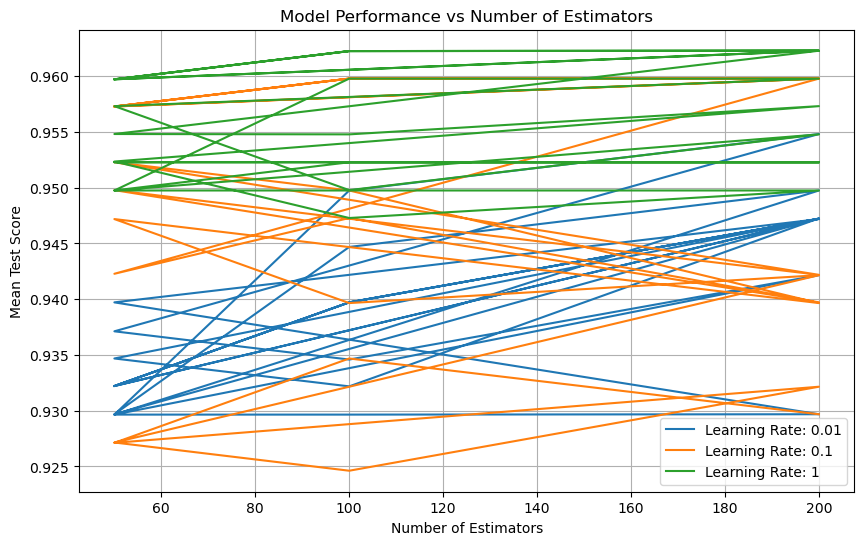

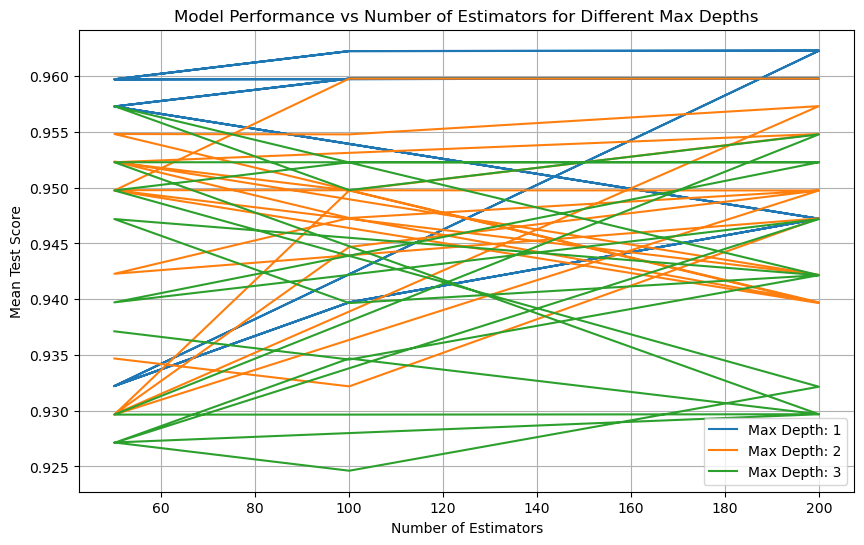

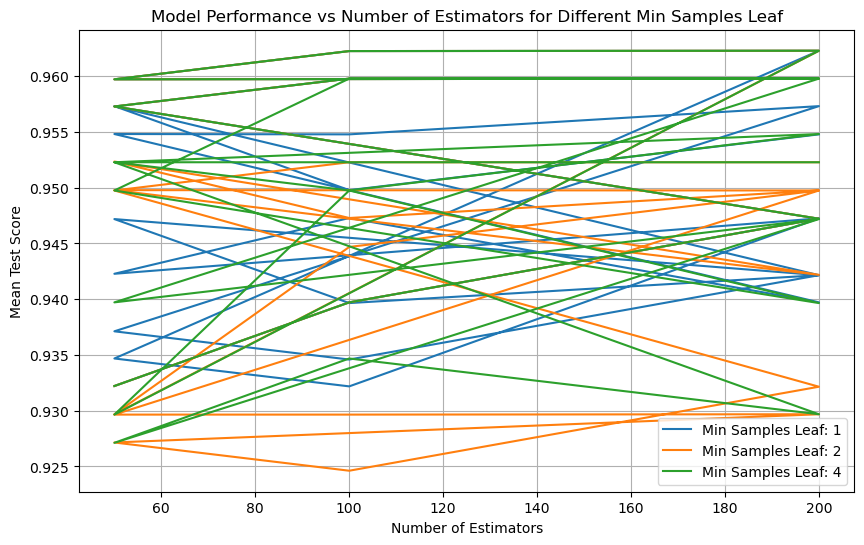

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the grid search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plotting the mean test scores for each hyperparameter configuration
plt.figure(figsize=(10, 6))

# Loop through each learning rate in the grid search parameter grid
for learning_rate in param_grid['learning_rate']:
    # Filter results for each learning rate
    subset = results[results['param_learning_rate'] == learning_rate]
    
    # Plot mean test score vs. n_estimators for each learning rate
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'Learning Rate: {learning_rate}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Model Performance vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

# Loop through each max_depth value in the grid search parameter grid
for max_depth in param_grid['base_estimator__max_depth']:
    # Filter results for each max_depth
    subset = results[results['param_base_estimator__max_depth'] == max_depth]
    
    # Plot mean test score vs. n_estimators for each max_depth
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'Max Depth: {max_depth}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Model Performance vs Number of Estimators for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

# Loop through each min_samples_leaf value in the grid search parameter grid
for min_samples_leaf in param_grid['base_estimator__min_samples_leaf']:
    # Filter results for each min_samples_leaf
    subset = results[results['param_base_estimator__min_samples_leaf'] == min_samples_leaf]
    
    # Plot mean test score vs. n_estimators for each min_samples_leaf
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'Min Samples Leaf: {min_samples_leaf}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Model Performance vs Number of Estimators for Different Min Samples Leaf')
plt.legend()
plt.grid(True)
plt.show()




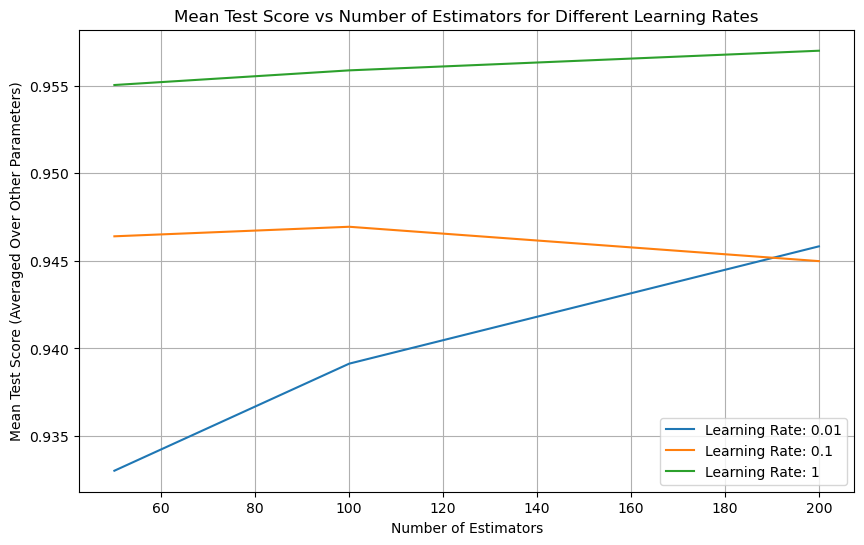

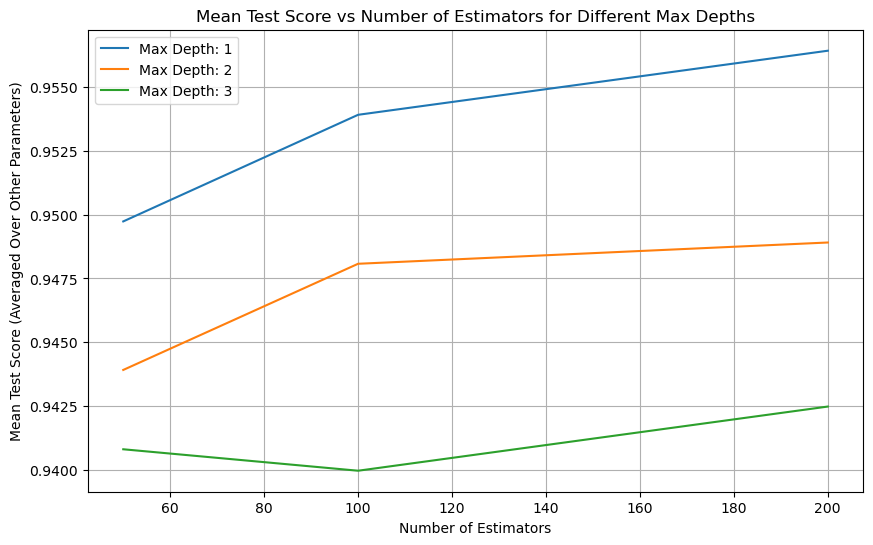

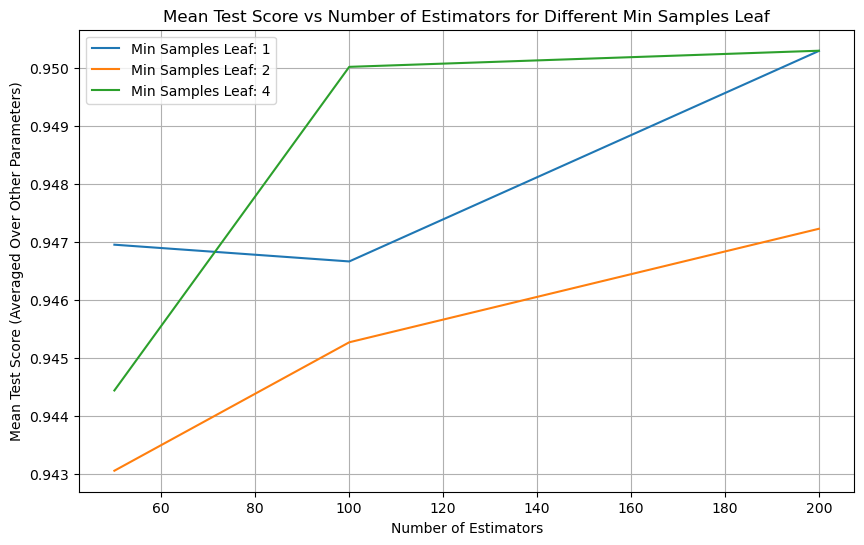

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert the grid search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Simplify the plot for 'learning_rate'
plt.figure(figsize=(10, 6))
for learning_rate in param_grid['learning_rate']:
    # Select only the rows corresponding to the current learning rate
    lr_subset = results[results['param_learning_rate'] == learning_rate]
    # Calculate the mean test score for each number of estimators, averaged over all depths and min_samples_leaf
    scores = lr_subset.groupby('param_n_estimators')['mean_test_score'].mean()
    plt.plot(scores.index, scores.values, label=f'Learning Rate: {learning_rate}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Averaged Over Other Parameters)')
plt.title('Mean Test Score vs Number of Estimators for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Simplify the plot for 'max_depth'
plt.figure(figsize=(10, 6))
for max_depth in param_grid['base_estimator__max_depth']:
    # Select only the rows corresponding to the current max depth
    depth_subset = results[results['param_base_estimator__max_depth'] == max_depth]
    # Calculate the mean test score for each number of estimators, averaged over all learning rates and min_samples_leaf
    scores = depth_subset.groupby('param_n_estimators')['mean_test_score'].mean()
    plt.plot(scores.index, scores.values, label=f'Max Depth: {max_depth}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Averaged Over Other Parameters)')
plt.title('Mean Test Score vs Number of Estimators for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()

# Simplify the plot for 'min_samples_leaf'
plt.figure(figsize=(10, 6))
for min_samples_leaf in param_grid['base_estimator__min_samples_leaf']:
    # Select only the rows corresponding to the current min samples leaf
    leaf_subset = results[results['param_base_estimator__min_samples_leaf'] == min_samples_leaf]
    # Calculate the mean test score for each number of estimators, averaged over all learning rates and max depths
    scores = leaf_subset.groupby('param_n_estimators')['mean_test_score'].mean()
    plt.plot(scores.index, scores.values, label=f'Min Samples Leaf: {min_samples_leaf}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Averaged Over Other Parameters)')
plt.title('Mean Test Score vs Number of Estimators for Different Min Samples Leaf')
plt.legend()
plt.grid(True)
plt.show()


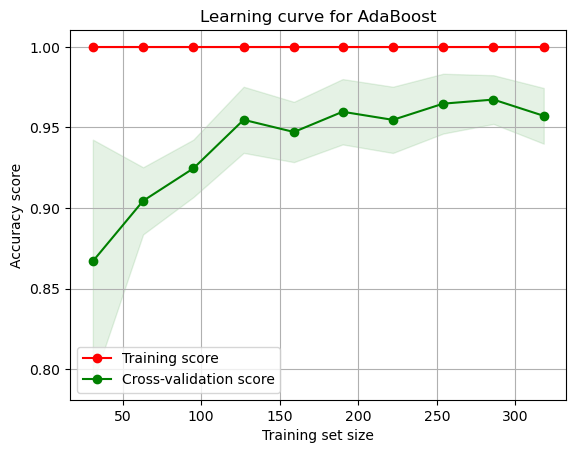

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_ada_clf, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

# Calculate the average and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning curve for AdaBoost')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [51]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(
    best_ada_clf, X_train, y_train, 
    cv=5, 
    scoring='accuracy'
)

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {np.mean(cross_val_scores)}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation scores: [0.975      0.975      0.9625     0.96202532 0.93670886]
Mean CV accuracy: 0.962246835443038


Accuracy: 0.9708
F1 Score: 0.9612
Precision: 0.9394
Recall: 0.9841
ROC AUC: 0.9966


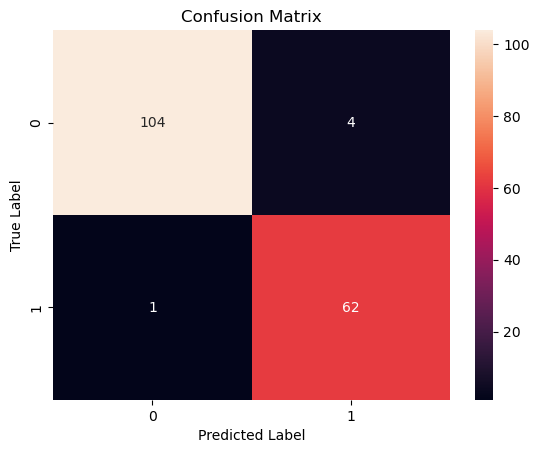

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Predict on the test set
y_pred = best_ada_clf.predict(X_test)
y_pred_proba = best_ada_clf.predict_proba(X_test)[:, 1]  # probabilities for ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


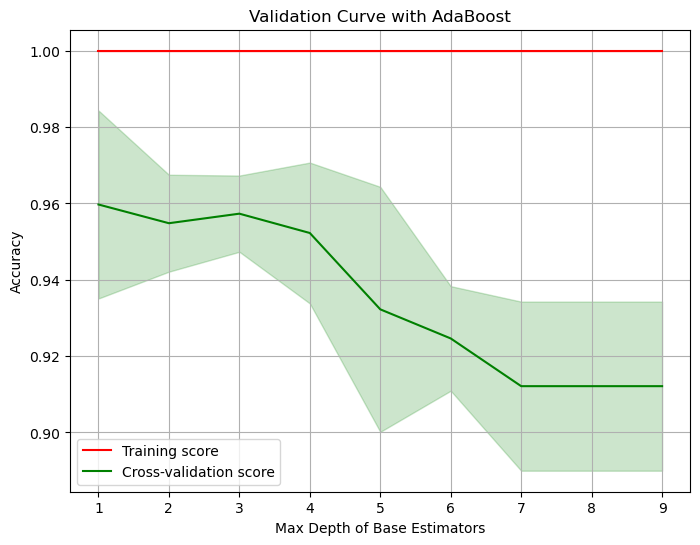

In [53]:
from sklearn.model_selection import validation_curve

# Create range of values for the parameter
param_range = np.arange(1, 10)

# Calculate accuracy on training and test set using the range of parameter values
train_scores, test_scores = validation_curve(
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42), 
    X_train, y_train, 
    param_name="base_estimator__max_depth", 
    param_range=param_range, 
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="Cross-validation score", color="g")

# Plotting the band of the standard deviation
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Validation Curve with AdaBoost")
plt.xlabel("Max Depth of Base Estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

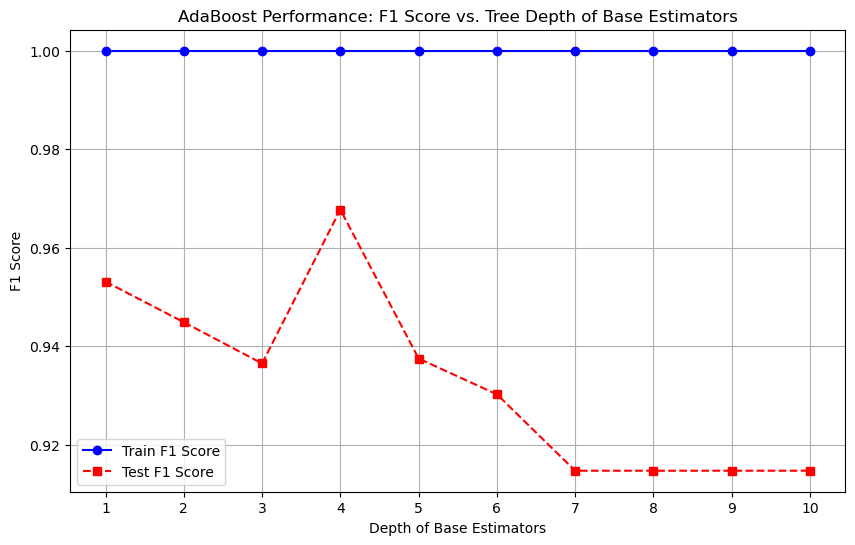

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Define the range of tree depths to explore
max_depths = range(1, 11)  # Adjust this range based on the previous validation curve results if needed
train_f1_scores = []
test_f1_scores = []

# Loop over the range of tree depths
for depth in max_depths:
    # Initialize and train the AdaBoostClassifier at the given depth
    ada = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=depth), 
        n_estimators=50,  # Keep the number of estimators constant
        learning_rate=1.0,  # You may adjust the learning rate if necessary
        random_state=42
    )
    ada.fit(X_train, y_train)
    
    # Make predictions on both the training and test sets
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    
    # Calculate and record the F1 score for both training and testing sets
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Plotting Train and Test F1 Scores vs. Tree Depth for AdaBoost
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_f1_scores, marker='o', linestyle='-', color='blue', label='Train F1 Score')
plt.plot(max_depths, test_f1_scores, marker='s', linestyle='--', color='red', label='Test F1 Score')
plt.title('AdaBoost Performance: F1 Score vs. Tree Depth of Base Estimators')
plt.xlabel('Depth of Base Estimators')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score

# Initialize AdaBoost with DecisionTreeClassifier of max_depth 4
ada_depth_4 = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=4), 
    n_estimators=200,  # As per your best parameters
    learning_rate=1,
    random_state=42
)

# Perform cross-validation
cv_scores_depth_4 = cross_val_score(ada_depth_4, X_train, y_train, cv=5, scoring='f1')

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation F1 scores with max_depth 4: {cv_scores_depth_4}")
print(f"Mean CV F1 score with max_depth 4: {np.mean(cv_scores_depth_4)}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation F1 scores with max_depth 4: [0.96551724 0.9        0.94915254 0.96428571 0.89655172]
Mean CV F1 score with max_depth 4: 0.9351014444351675


Accuracy: 0.9707602339181286
F1 Score: 0.9612403100775193
ROC AUC Score: 0.9973544973544973


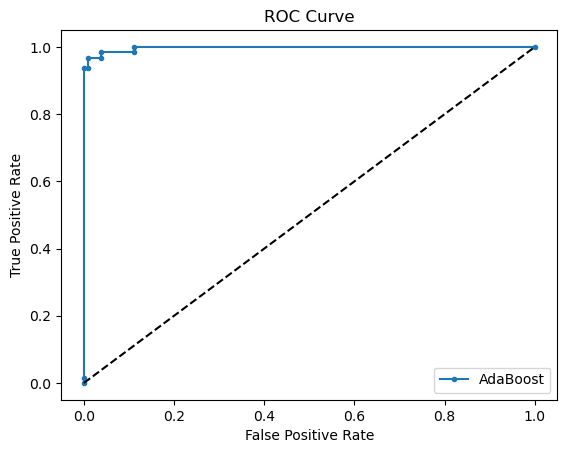

In [56]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # probabilities needed for ROC AUC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))  # use probabilities

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # use probabilities
plt.plot(fpr, tpr, marker='.', label='AdaBoost')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
bc_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT-1\\Breast Cancer Wisconsin.csv')
bc_data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Feature Scaling
X = bc_data.drop('diagnosis', axis=1).values
y = bc_data['diagnosis'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists for line plot data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for bar chart data (metrics with the optimal number of estimators)
training_time_optimal_ada = None
testing_time_optimal_ada = None
accuracy_optimal_ada = None
precision_optimal_ada = None
recall_optimal_ada = None
f1_score_optimal_ada = None

optimal_n_estimators = 50  # Assuming this is the optimal number of estimators found

# Loop through training sizes for line plots
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_scaled, y, train_size=size, random_state=42)
    ada = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=optimal_n_estimators,
        random_state=42
    )

    start_time = time.perf_counter()
    ada.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time

    start_time = time.perf_counter()
    ada.predict(X_test_part)
    testing_time = (time.perf_counter() - start_time)

    training_sizes_line.append(size * 100)  # Convert to percentage
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Metrics for bar chart with the optimal number of estimators
ada_optimal = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=optimal_n_estimators,
    random_state=42
)
ada_optimal.fit(X_train, y_train)

start_time = time.perf_counter()
y_pred_optimal_ada = ada_optimal.predict(X_test)
testing_time_optimal_ada = (time.perf_counter() - start_time)

accuracy_optimal_ada = accuracy_score(y_test, y_pred_optimal_ada)
precision_optimal_ada = precision_score(y_test, y_pred_optimal_ada)
recall_optimal_ada = recall_score(y_test, y_pred_optimal_ada)
f1_score_optimal_ada = f1_score(y_test, y_pred_optimal_ada)

# Create DataFrames
line_plot_df_ada = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_optimal_ada, precision_optimal_ada, recall_optimal_ada, f1_score_optimal_ada]
})

# Export to Excel
with pd.ExcelWriter('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT-1\\Breast Cancer - Figures\\ada_performance_analysis.xlsx') as writer:
    line_plot_df_ada.to_excel(writer, sheet_name='Line Plots Data AdaBoost', index=False)
    bar_chart_df_ada.to_excel(writer, sheet_name='Bar Chart Data AdaBoost', index=False)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p